### Time Series Analysis
Time Series Forecasting Models are models capable of predicing future values based on previously observed values. They are widely used for Non Stationary Data i.e whose Mean and Standard Devitation are not constant over time

There are four main components of Time Series Analysis:
1. Trend
2. Seasonality
3. Irregularity
4. Cyclic

### Holt-Winters’ Linear method
  - Holt-Winters forecasting is a way to model and predict the behavior of a sequence of values over time—a time series
  - Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.
  - Holt-Winters uses exponential smoothing to encode lots of values from the past and use them to predict “typical” values for the present and future
  - The model predicts a current or future value by computing the combined effects of two influences: Typical Values (Average) and Slope (Trend)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

### 1. Understanding & Processing Data 

In [3]:
df = pd.read_csv("/Users/arnavgupta/Desktop/NUS Fintech Society/2. Time Series Analysis/Stock Price Data.csv")
df = df[['Date', 'Close']]
df1 = pd.to_datetime(df.Date)
df1 = df.set_index("Date")
print(df1.head())

                Close
Date                 
31/12/2009  36.998249
4/01/2010   37.234500
5/01/2010   37.162500
6/01/2010   37.133251
7/01/2010   37.059000


#### `Time Series Analysis`

<Figure size 432x288 with 0 Axes>

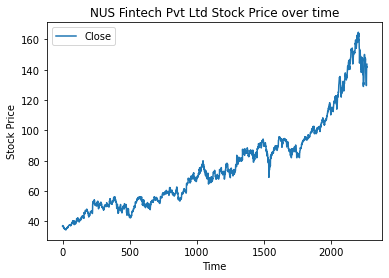

In [4]:
plt.figure("NUS Fintech Pvt Ltd Stock Price over time")
df.plot(style="-")
plt.title("NUS Fintech Pvt Ltd Stock Price over time")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

The above graph gives us a snapshot of NUS Fintech Pvt Ltd's stock price over time (2009 - 2018). We can see from the graph obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

### 2. Data Modelling & Forecasting

In [5]:
train_data = df1[0: int(0.8*len(df1))]
test_data = df1[int(0.8*len(df1)):]

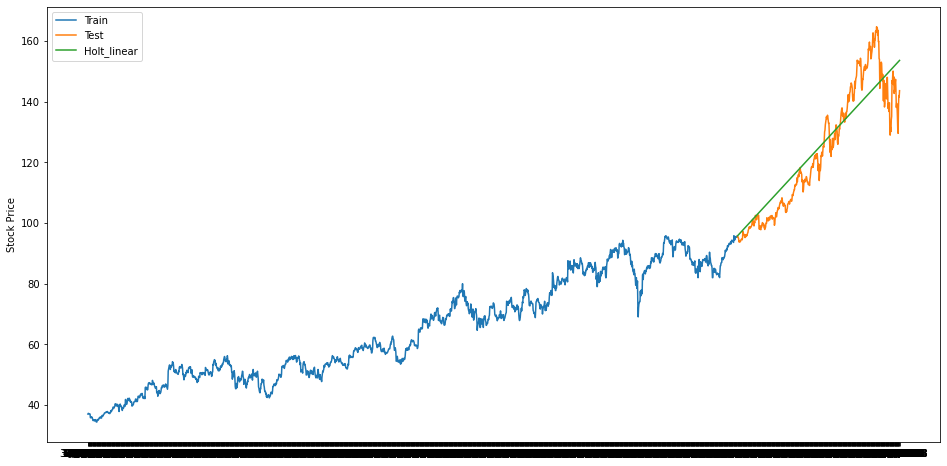

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test_data.copy()

fit1 = Holt(np.asarray(train_data['Close'])).fit(smoothing_level = 0.6,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test_data))

plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.ylabel("Stock Price")
plt.show()

### 3. Model Evaluation

#### `Mean Squared Error`

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_data.Close, y_hat_avg.Holt_linear))
print(rms)

7.6418592899218565


We have choosen the parameters as such, which minimises the Mean Squared Error values

### 4. Model Forecasting

In [8]:
df2 = pd.read_excel("~/Desktop/NUS Fintech Society/2. Time Series Analysis/Stock Price Data_output.xlsx")
df2 = df2[['Date', 'Close']]
df3 = pd.to_datetime(df2.Date)
df3 = df.set_index("Date")
print(df2.head())

        Date      Close
0 2009-12-31  36.998249
1 2010-01-04  37.234500
2 2010-01-05  37.162500
3 2010-01-06  37.133251
4 2010-01-07  37.059000


In [9]:
future_data = df2[int(0.8*len(df1)):]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = future_data.copy()

fit1 = Holt(np.asarray(train_data['Close'])).fit(smoothing_level = 0.6,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(future_data))

plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.ylabel("Stock Price")
plt.legend(loc='best')
plt.show()

In [ ]:
predict = fit1.forecast(len(future_data))
future_data['prediction'] = predict
predict = pd.DataFrame(predict)
print(predict)

In [ ]:
predict.to_excel("my_submission_2.0.xlsx")